<a href="https://colab.research.google.com/github/VishwajeetJa/VishwajeetJa/blob/main/Stock_Market_Forecasting_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv("stockmarket.csv", parse_dates=['Date'])

In [ ]:
df

,Date,Open,High,Low,Close,Volume
0,2005-01-03,100.605555,101.204118,100.224376,100.496714,450075
1,2005-01-04,100.325893,104.200992,99.652608,100.358450,474257
2,2005-01-05,101.164953,102.440271,96.512383,101.006138,323167
3,2005-01-06,101.061133,104.413151,102.175506,102.529168,904715
4,2005-01-07,101.654940,107.261288,99.599456,102.295015,722582
...,...,...,...,...,...,...
29995,2119-12-25,89.839838,90.771790,85.787388,90.531012,921396
29996,2119-12-26,91.527623,95.378069,90.156839,91.975616,674801
29997,2119-12-27,91.147500,93.361488,90.174307,91.474249,336068
29998,2119-12-28,90.977802,94.528841,87.553561,89.581892,355024


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    30000 non-null  datetime64[ns]
 1   Open    30000 non-null  float64       
 2   High    30000 non-null  float64       
 3   Low     30000 non-null  float64       
 4   Close   30000 non-null  float64       
 5   Volume  30000 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 1.4 MB


In [ ]:
df.count()

,0
Date,30000
Open,30000
High,30000
Low,30000
Close,30000
Volume,30000


In [ ]:
df.describe()

,Date,Open,High,Low,Close,Volume
count,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2062-07-01 12:00:00,128.206122,130.690629,125.682747,128.200810,549256.865400
min,2005-01-03 00:00:00,20.133547,21.299310,16.963232,20.904046,100027.000000
25%,2033-10-02 06:00:00,87.987859,90.345800,85.338902,88.069888,323893.500000
50%,2062-07-01 12:00:00,132.459824,135.085095,129.947384,132.517194,548679.500000
75%,2091-03-30 18:00:00,174.042457,176.654053,171.573029,173.983437,773857.750000
max,2119-12-29 00:00:00,229.149776,232.088627,227.312198,228.371446,999984.000000
std,NaN,50.221859,50.232980,50.227030,50.209351,260022.469783


<Axes: >

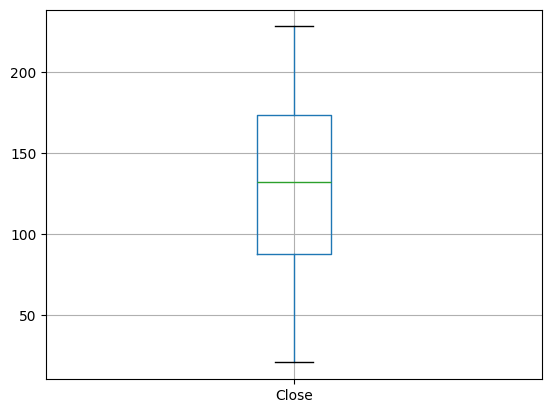

In [ ]:
df.boxplot("Close")

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
29995,False
29996,False
29997,False
29998,False


array([[<Axes: title={'center': 'Close'}>]], dtype=object)

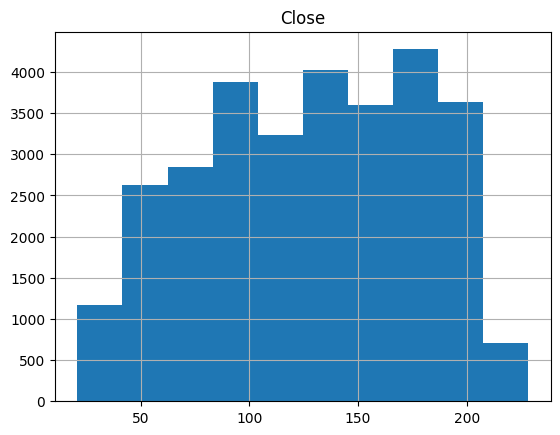

In [ ]:
df.hist("Close")

In [ ]:
df.set_index("Date", inplace=True)
df = df[['Close']]

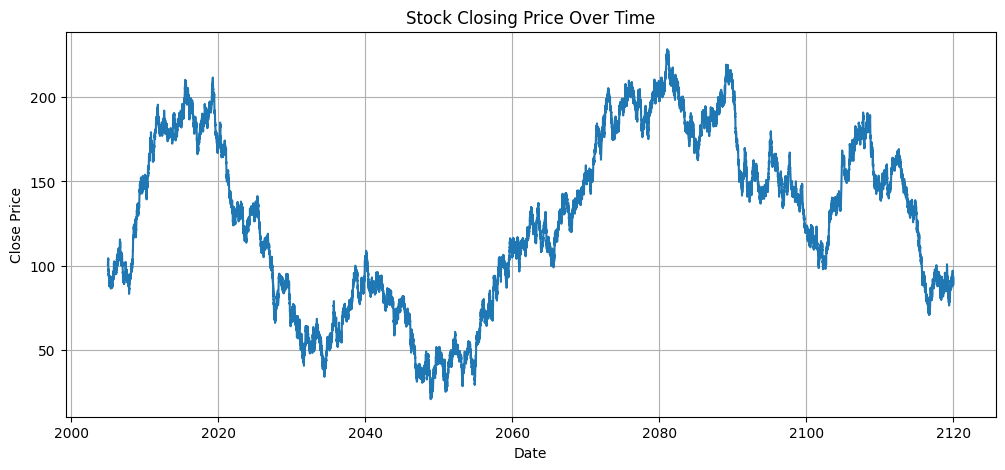

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['Close'])
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid()
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


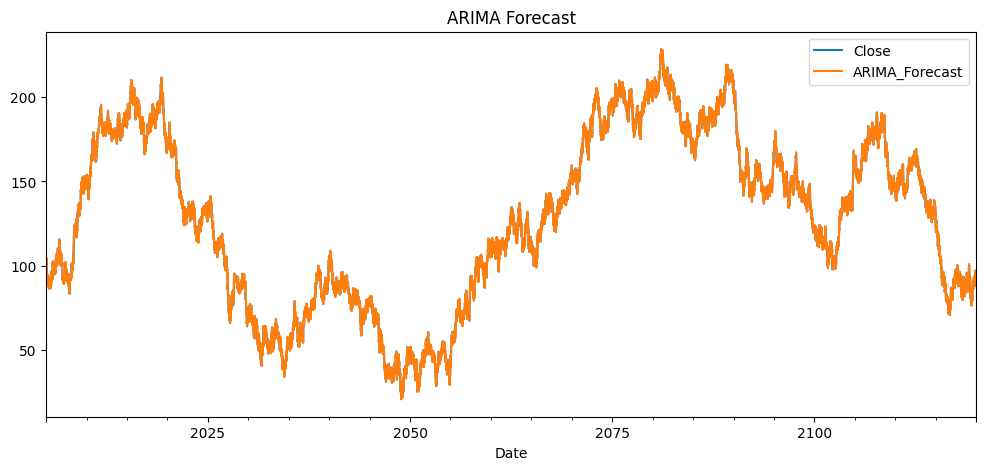

In [ ]:
model_arima = ARIMA(df['Close'], order=(5,1,0))
results_arima = model_arima.fit()
df['ARIMA_Forecast'] = results_arima.predict(start=1, end=len(df), typ='levels')
df[['Close', 'ARIMA_Forecast']].plot(figsize=(12,5), title="ARIMA Forecast")
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


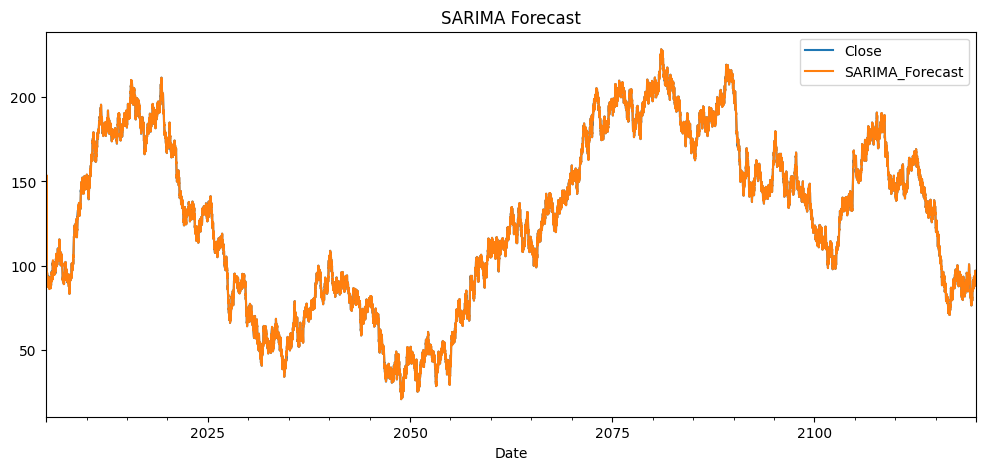

In [ ]:

model_sarima = SARIMAX(df['Close'], order=(1,1,1), seasonal_order=(1,1,1,12))
results_sarima = model_sarima.fit()
df['SARIMA_Forecast'] = results_sarima.predict(start=1, end=len(df), dynamic=False)
df[['Close', 'SARIMA_Forecast']].plot(figsize=(12,5), title="SARIMA Forecast")
plt.show()


In [ ]:
df.dropna(inplace=True)
print(df.head(), df.shape)


                 Close  ARIMA_Forecast  SARIMA_Forecast
Date                                                   
2005-01-04  100.358450      100.496714       100.496714
2005-01-05  101.006138      100.359209       100.358449
2005-01-06  102.529168      101.003141       101.006138
2005-01-07  102.295015      102.518496       102.529168
2005-01-10  102.060878      102.288526       102.295015 (29999, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
data = df.values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
x_train, y_train = [], []
for i in range(60, len(scaled_data)):
    x_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:

model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(x_train, y_train, epochs=3, batch_size=32)

Epoch 1/3
936/936 ━━━━━━━━━━━━━━━━━━━━ 53s 53ms/step - loss: 0.0124
Epoch 2/3
936/936 ━━━━━━━━━━━━━━━━━━━━ 48s 52ms/step - loss: 1.3415e-04
Epoch 3/3
936/936 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - loss: 1.2151e-04


In [ ]:
predicted_stock_price = model_lstm.predict(x_train)
# Create a temporary array with the same shape as the original scaled data
temp = np.zeros((len(predicted_stock_price), scaled_data.shape[1]))
# Replace the 'Close' column (index 0) with the predicted values
temp[:, 0] = predicted_stock_price[:, 0]
# Inverse transform the temporary array
predicted_stock_price = scaler.inverse_transform(temp)[:, 0]

936/936 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step


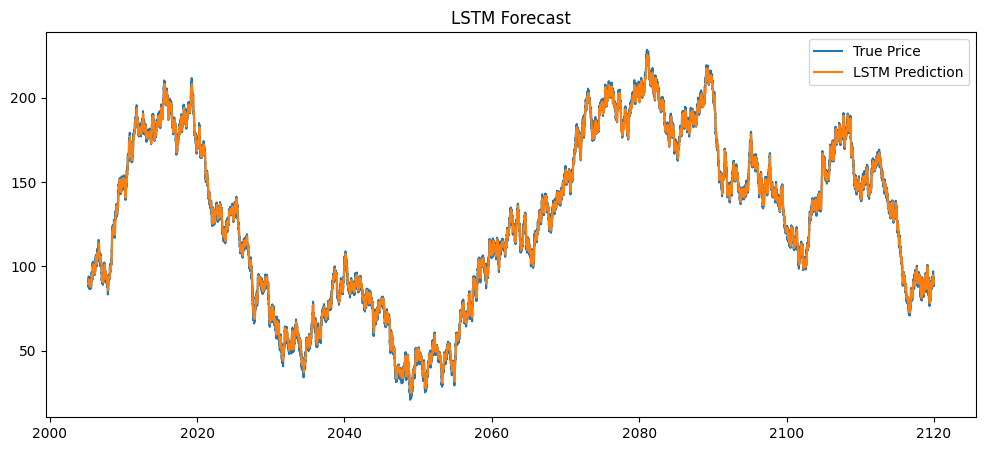

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df.index[60:], df['Close'].values[60:], label='True Price')
plt.plot(df.index[60:], predicted_stock_price, label='LSTM Prediction')
plt.legend()
plt.title("LSTM Forecast")
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvg3t7fwl/w4gr3pln.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvg3t7fwl/s6ke8jf2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12151', 'data', 'file=/tmp/tmpvg3t7fwl/w4gr3pln.json', 'init=/tmp/tmpvg3t7fwl/s6ke8jf2.json', 'output', 'file=/tmp/tmpvg3t7fwl/prophet_modelenn0irok/prophet_model-20250722184616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:46:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:46:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


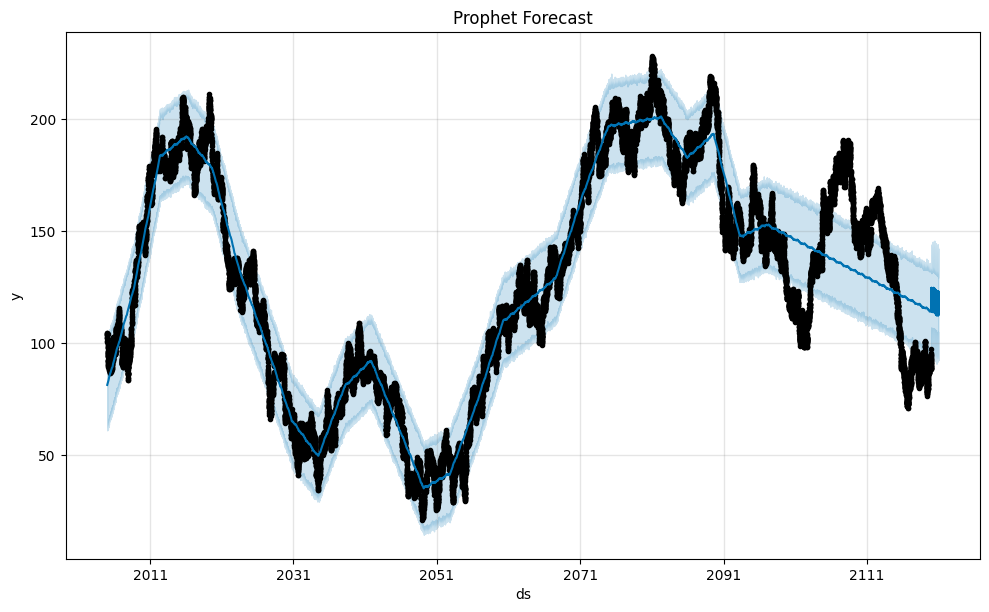

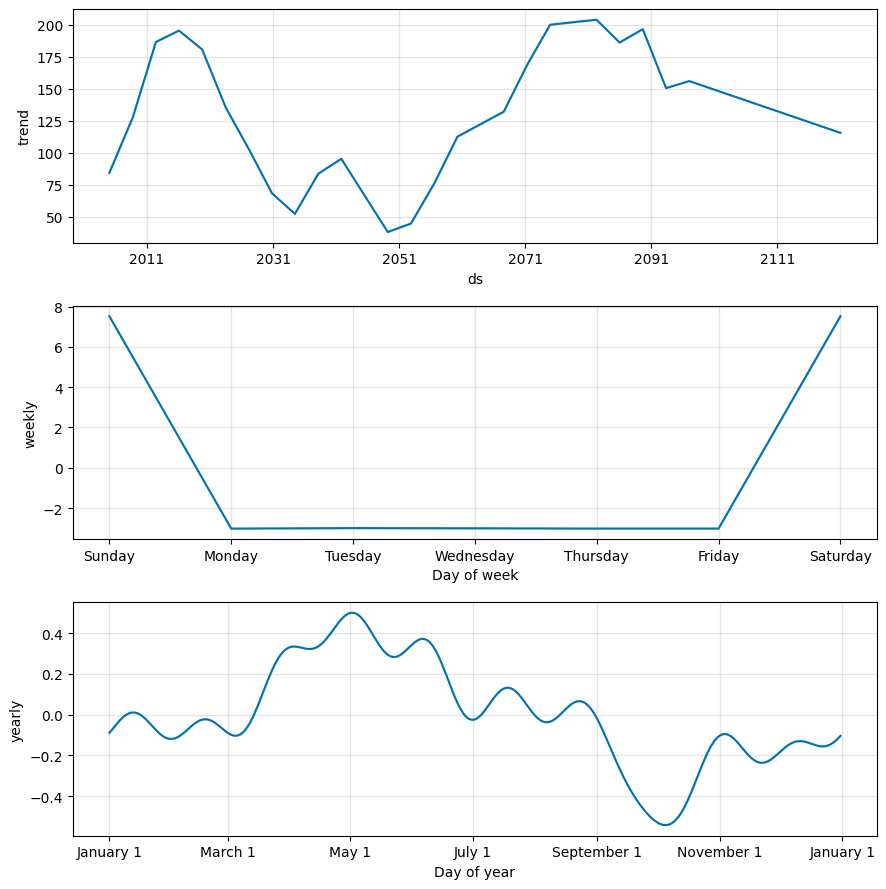

In [ ]:
from prophet import Prophet

# Prepare data for Prophet
prophet_df = df[['Close']].reset_index()
prophet_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Initialize and fit the Prophet model
model_prophet = Prophet()
model_prophet.fit(prophet_df)

# Make future predictions
future = model_prophet.make_future_dataframe(periods=365) # Predicting for the next year
forecast = model_prophet.predict(future)

# Plot the forecast
fig1 = model_prophet.plot(forecast)
plt.title("Prophet Forecast")
plt.show()

# Plot the components
fig2 = model_prophet.plot_components(forecast)
plt.show()